# MNIST Handwriting Data Set

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


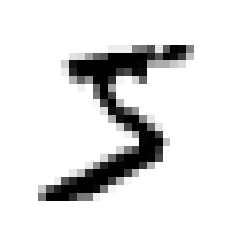

5


In [3]:
import matplotlib
import matplotlib.pyplot as pyplot

some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)

pyplot.imshow(some_digit_image, cmap="binary")
pyplot.axis("off")
pyplot.show()

print(y[0])

In [4]:
import numpy

y = y.astype(numpy.uint8)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classifier - Stochastic Gradient Descent(SGD) Classifier

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [8]:
sgd_clf.predict([some_digit])

c:\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return numpy.zeros((len(X), 1), dtype=bool)

In [11]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [15]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [16]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

c:\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [20]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

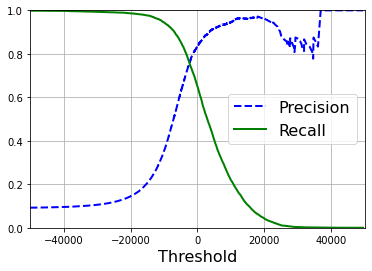

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    pyplot.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    pyplot.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    pyplot.legend(loc="center right", fontsize=16)
    pyplot.xlabel("Threshold", fontsize=16)
    pyplot.grid(True)
    pyplot.axis([-50000, 50000, 0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
pyplot.show()

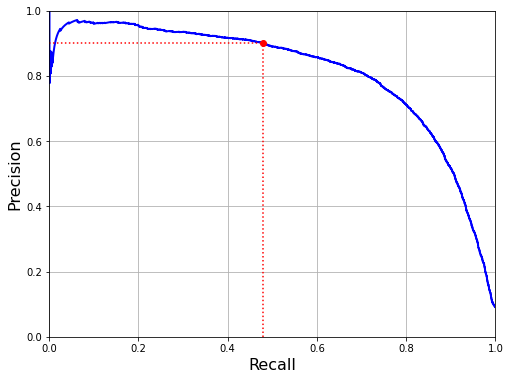

In [29]:
recall_90_precision = recalls[numpy.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[numpy.argmax(precisions >= 0.90)]

def plot_precision_vs_recall(precisions, recalls):
    pyplot.plot(recalls, precisions, "b-", linewidth=2)
    pyplot.xlabel("Recall", fontsize=16)
    pyplot.ylabel("Precision", fontsize=16)
    pyplot.axis([0, 1, 0, 1])
    pyplot.grid(True)

pyplot.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
pyplot.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
pyplot.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
pyplot.plot([recall_90_precision], [0.9], "ro")
pyplot.show()

In [34]:
threshold_90_precision = thresholds[numpy.argmax(precisions >= 0.90)]

In [35]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [36]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [37]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

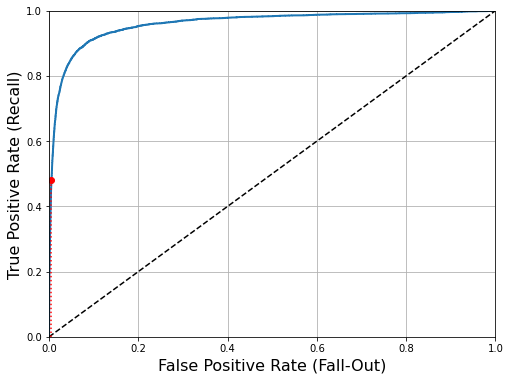

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    pyplot.plot(fpr, tpr, linewidth=2, label=label)
    pyplot.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    pyplot.axis([0, 1, 0, 1])
    pyplot.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    pyplot.ylabel('True Positive Rate (Recall)', fontsize=16)
    pyplot.grid(True)

pyplot.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[numpy.argmax(tpr >= recall_90_precision)]
pyplot.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
pyplot.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
pyplot.plot([fpr_90], [recall_90_precision], "ro")
pyplot.show()

# Multiclass Classifier